In [4]:
import pandas as pd 
import datetime as d
import sqlalchemy as sql 
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math 
import random



The combine data Part:

In [5]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [211002,210925,210918,210911,210807,201226,201219,201107,201114,201121]
blood_df1 = get_data(week_nums)
blood_df1.to_csv('Data.csv',index=False)
blood_df1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188
...,...,...,...,...,...,...,...,...,...,...,...
210252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/20/2020,04:00:00,REGULAR,5554,541
210253,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/20/2020,08:00:00,REGULAR,5554,541
210254,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/20/2020,12:00:00,REGULAR,5554,541
210255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/20/2020,16:00:00,REGULAR,5554,541


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

The Read File from SQL Part:

In [6]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///DataBlood.db")
df_blood= pd.read_sql('SELECT * from data;',engine)

In [7]:
df_blood.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Strip Part:


In [8]:
blood_df1.columns = [column.strip() for column in blood_df1.columns]
blood_df1.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Find Null Value and Droped Part:

In [9]:
blood_df1.ENTRIES.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
210252    False
210253    False
210254    False
210255    False
210256    False
Name: ENTRIES, Length: 2104853, dtype: bool

Drop null values:

In [10]:
blood_df2 = blood_df1.dropna()
blood_df2.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Sort Values Part:

In [11]:
blood_df2.DATE.value_counts().sort_index()

07/31/2021    29897
08/01/2021    29858
08/02/2021    29893
08/03/2021    30024
08/04/2021    29927
              ...  
12/21/2020    29727
12/22/2020    30099
12/23/2020    29871
12/24/2020    30014
12/25/2020    30150
Name: DATE, Length: 70, dtype: int64

Combine the DATE and TIME Column Part: 

In [12]:
blood_df2["DATE_TIME"] = pd.to_datetime(blood_df2.DATE + " " + blood_df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Drop Duplicates Part:

In [13]:
(blood_df2
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,ENTRIES
2194,N339A,R114,00-03-01,PARSONS BLVD,640
2191,N339A,R114,00-00-00,PARSONS BLVD,640
2192,N339A,R114,00-00-01,PARSONS BLVD,640
2196,N339A,R114,00-03-03,PARSONS BLVD,639
2195,N339A,R114,00-03-02,PARSONS BLVD,639
2193,N339A,R114,00-03-00,PARSONS BLVD,638
2197,N339A,R114,00-03-04,PARSONS BLVD,635
2724,N605,R024,00-05-01,SUTPHIN-ARCHER,609
2727,N605,R024,00-06-02,SUTPHIN-ARCHER,609
2726,N605,R024,00-06-01,SUTPHIN-ARCHER,609


In [14]:
blood_df2.shape

(2104853, 12)

In [15]:
mask = (blood_df2.duplicated(subset =['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'], keep ='first'))
blood_df2[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
208510,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/25/2021,12:00:00,RECOVR AUD,1216177,140,2021-09-25 12:00:00
208513,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/25/2021,20:00:00,RECOVR AUD,1216201,140,2021-09-25 20:00:00
208515,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/26/2021,00:00:00,RECOVR AUD,1216203,140,2021-09-26 00:00:00
208518,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/26/2021,08:00:00,RECOVR AUD,1216213,140,2021-09-26 08:00:00
208520,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/26/2021,12:00:00,RECOVR AUD,1216237,140,2021-09-26 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
207817,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/10/2021,08:00:00,RECOVR AUD,1397331,324,2021-09-10 08:00:00
207820,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/10/2021,12:00:00,RECOVR AUD,1397376,324,2021-09-10 12:00:00
135006,R110,R027,01-00-02,WALL ST,23,IRT,12/14/2020,23:00:00,RECOVR AUD,36,26,2020-12-14 23:00:00
135008,R110,R027,01-00-02,WALL ST,23,IRT,12/15/2020,03:00:00,RECOVR AUD,39,31,2020-12-15 03:00:00


In [16]:
blood_df3= blood_df2[blood_df2['DESC']=='REGULAR']

In [17]:
blood_df3.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [18]:
blood_df3.sample(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
104019,N512,R163,00-00-01,14 ST,FLM123,IND,12/15/2020,07:00:00,REGULAR,11534,23095,2020-12-15 07:00:00
49151,N024,R332,00-00-02,135 ST,BC,IND,11/06/2020,16:00:00,REGULAR,7344810,1255965,2020-11-06 16:00:00


In [19]:
(blood_df3
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,ENTRIES
2190,N339A,R114,00-00-01,PARSONS BLVD,640
2189,N339A,R114,00-00-00,PARSONS BLVD,640
2192,N339A,R114,00-03-01,PARSONS BLVD,639
2193,N339A,R114,00-03-02,PARSONS BLVD,630
2194,N339A,R114,00-03-03,PARSONS BLVD,629


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************


Drop Unwant Column Part:

In [20]:
#df2.drop(["LINENAME","DIVISION","DESC"], axis=1, errors="ignore",inplace=True)


In [21]:
blood_df3.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,2021-09-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,2021-09-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,2021-09-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,2021-09-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,2021-09-25 16:00:00


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Create a new DataFrame Part:

In [22]:
blood_df_Daily=(blood_df3.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","DATE_TIME","EXITS"],as_index=False)
                        .ENTRIES.first()
               )

In [23]:
blood_df_Daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES
0,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 00:00:00,2603110,7611181
1,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 04:00:00,2603113,7611192
2,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 08:00:00,2603126,7611197
3,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 12:00:00,2603178,7611235
4,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 16:00:00,2603211,7611357


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Create A new Column Name is TIME_INTERVAL Part:

In [24]:
blood_df_Daily["TIME_INTERVAL"] = (
    np.where( (blood_df_Daily.DATE_TIME.dt.hour <= 4), "0:00 to 4:00"
         ,np.where(
             (blood_df_Daily.DATE_TIME.dt.hour <= 8), "4:00 to 8:00"
             ,np.where(
                 (blood_df_Daily.DATE_TIME.dt.hour <= 12), "8:00 to 12:00"
                 ,np.where(
                     (blood_df_Daily.DATE_TIME.dt.hour <= 16), "12:00 to 16:00"
                     ,np.where(
                         (blood_df_Daily.DATE_TIME.dt.hour <= 20), "16:00 to 20:00"
                         ,"20:00 to 24:00"))))))

Create a new Column by shift Part:

In [25]:
blood_df_Daily[["P_DATE","P_ENTRIES","P_EXITS"]] = (blood_df_Daily.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])["DATE","ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-25-c998b8faabe7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  blood_df_Daily[["P_DATE","P_ENTRIES","P_EXITS"]] = (blood_df_Daily.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])["DATE","ENTRIES","EXITS"]


In [26]:
blood_df_Daily.head(7)

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS
0,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 00:00:00,2603110,7611181,0:00 to 4:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 04:00:00,2603113,7611192,0:00 to 4:00,07/31/2021,7611181.0,2603110.0
2,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 08:00:00,2603126,7611197,4:00 to 8:00,NaN,NaN,NaN
3,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 12:00:00,2603178,7611235,8:00 to 12:00,NaN,NaN,NaN
4,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 16:00:00,2603211,7611357,12:00 to 16:00,NaN,NaN,NaN
5,A002,R051,02-00-00,59 ST,07/31/2021,2021-07-31 20:00:00,2603241,7611512,16:00 to 20:00,NaN,NaN,NaN
6,A002,R051,02-00-00,59 ST,08/01/2021,2021-08-01 00:00:00,2603256,7611600,0:00 to 4:00,07/31/2021,7611192.0,2603113.0


In [27]:
blood_df_Daily.shape

(2096110, 12)

In [28]:
blood_df_Daily.dropna(subset=["P_DATE"], axis=0, inplace=True)

In [29]:
(blood_df_Daily[blood_df_Daily["ENTRIES"] < blood_df_Daily["P_ENTRIES"]]
.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])
.size())

C/A    UNIT  SCP       STATION        TIME_INTERVAL 
A002   R051  02-00-00  59 ST          0:00 to 4:00      1
                                      12:00 to 16:00    1
                                      16:00 to 20:00    1
                                      4:00 to 8:00      1
                                      8:00 to 12:00     1
                                                       ..
TRAM2  R469  00-03-01  RIT-ROOSEVELT  12:00 to 16:00    1
                                      16:00 to 20:00    1
                                      20:00 to 24:00    1
                                      4:00 to 8:00      1
                                      8:00 to 12:00     1
Length: 24945, dtype: int64

In [30]:
(blood_df_Daily[blood_df_Daily["EXITS"] < blood_df_Daily["P_EXITS"]]
.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])
.size())

C/A    UNIT  SCP       STATION        TIME_INTERVAL 
A002   R051  02-00-00  59 ST          0:00 to 4:00      1
                                      12:00 to 16:00    1
                                      16:00 to 20:00    1
                                      4:00 to 8:00      1
                                      8:00 to 12:00     1
                                                       ..
TRAM2  R469  00-05-01  RIT-ROOSEVELT  12:00 to 16:00    1
                                      16:00 to 20:00    1
                                      20:00 to 24:00    1
                                      4:00 to 8:00      1
                                      8:00 to 12:00     1
Length: 24848, dtype: int64

In [31]:
blood_df_Daily[blood_df_Daily["ENTRIES"] < blood_df_Daily["P_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS
209,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 00:00:00,2545767,7481098,0:00 to 4:00,10/01/2021,7644614.0,2616579.0
211,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 08:00:00,2545786,7481117,4:00 to 8:00,10/01/2021,7644640.0,2616641.0
212,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 12:00:00,2545831,7481158,8:00 to 12:00,10/01/2021,7644702.0,2616769.0
213,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 16:00:00,2545868,7481285,12:00 to 16:00,10/01/2021,7644906.0,2616815.0
214,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 20:00:00,2545895,7481453,16:00 to 20:00,10/01/2021,7645237.0,2616854.0


In [32]:
blood_df_Daily[blood_df_Daily["EXITS"] < blood_df_Daily["P_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS
209,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 00:00:00,2545767,7481098,0:00 to 4:00,10/01/2021,7644614.0,2616579.0
211,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 08:00:00,2545786,7481117,4:00 to 8:00,10/01/2021,7644640.0,2616641.0
212,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 12:00:00,2545831,7481158,8:00 to 12:00,10/01/2021,7644702.0,2616769.0
213,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 16:00:00,2545868,7481285,12:00 to 16:00,10/01/2021,7644906.0,2616815.0
214,A002,R051,02-00-00,59 ST,10/31/2020,2020-10-31 20:00:00,2545895,7481453,16:00 to 20:00,10/01/2021,7645237.0,2616854.0


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Find The Outlier and Removet :

In [33]:

def get_daily_counts(row, max_counter):
    counter = abs(row["ENTRIES"] - row["P_ENTRIES"])
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["P_ENTRIES"])
        counter = min(row["ENTRIES"], row["P_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
blood_df_Daily["DAILY_ENTRIES"] = blood_df_Daily.apply(get_daily_counts, axis=1, max_counter=1000000)



6592536 81096.0
6592553 81117.0
6592584 81176.0
6592704 81341.0
6592769 81599.0
17095217 127930.0
17095241 127949.0
17095265 127980.0
17095323 128088.0
17095407 128241.0
1386871 51019.0
1386871 51035.0
1386872 51101.0
1386876 51228.0
1386888 51400.0
3040013 40127.0
3040024 40144.0
3040047 40201.0
3040107 40362.0
3040198 40586.0
5 3055031.0
197 3055175.0
289 3055256.0
301 3055269.0
303 3055273.0
335 3055293.0
4310787 45225.0
4310794 45249.0
4310813 45318.0
4310858 45410.0
4310899 45550.0
11641252 157770.0
11641299 157830.0
11641338 157935.0
11641428 158180.0
11641573 158542.0
5082772 87800.0
5082781 87805.0
5082808 87856.0
5082902 87978.0
5083011 88146.0
18166972 314963.0
18166972 314988.0
18167019 315157.0
18167230 315580.0
18167687 316543.0
18168113 317407.0
1624751 46699.0
1624762 46714.0
1624782 46752.0
1624829 46797.0
1624891 46883.0
9 1630800.0
28 1630833.0
106 1630866.0
123 1630877.0
125 1630880.0
127 1630781.0
2639010 28710.0
2639019 28716.0
2639027 28741.0
2639053 28783.0
26390

In [34]:
def get_daily_counts(row, max_counter):
    counter =abs(row["EXITS"] - row["P_EXITS"])
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["P_EXITS"])
        counter = min(row["EXITS"], row["P_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
blood_df_Daily["DAILY_EXITS"] = blood_df_Daily.apply(get_daily_counts, axis=1, max_counter=1000000)

8800937 112798.0
8800997 112986.0
8801114 113253.0
8801234 113407.0
8801324 113556.0
18793176 160348.0
18793194 160437.0
18793264 160650.0
18793383 160798.0
18793471 160977.0
1087120 22586.0
1087135 22655.0
1087146 22730.0
1087178 22791.0
1087229 22885.0
0 1094025.0
78 1094058.0
107 1094082.0
113 1094089.0
136 1094108.0
178 1094158.0
29623060 504852.0
29623185 505276.0
29623561 506280.0
29623960 507124.0
29624348 508272.0
1713110 35944.0
1713126 35967.0
1713138 36033.0
1713158 36065.0
1713183 36128.0
7342074 210435.0
7342082 210446.0
7342233 211028.0
7342576 211520.0
7342912 211854.0
7343103 212076.0
6986936 242848.0
6986975 242961.0
6987098 243301.0
6987342 243630.0
6987609 244102.0
23 7016161.0
136 7016281.0
345 7016439.0
405 7016484.0
418 7016489.0
442 7016028.0
13773506 201142.0
13773548 201239.0
13773660 201546.0
13773827 201805.0
13774009 202133.0
181 13800053.0
243 13800104.0
247 13800113.0
264 13800138.0
373 13800292.0
491 13800450.0
17291040 9175.0
17291044 9069.0
17291046 929

In [35]:
blood_df_Daily.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS,DAILY_ENTRIES,DAILY_EXITS
1364689,R123,R290,00-00-02,HOUSTON ST,08/05/2021,2021-08-05 21:00:00,71,240,20:00 to 24:00,08/04/2021,993695.0,287043.0,993455.0,286972.0
1364692,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 09:00:00,169,408,8:00 to 12:00,08/05/2021,993855.0,287172.0,993447.0,287003.0
1364690,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 01:00:00,87,354,0:00 to 4:00,08/05/2021,993801.0,287060.0,993447.0,286973.0
1364693,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 13:00:00,227,516,12:00 to 16:00,08/05/2021,993961.0,287226.0,993445.0,286999.0
1364691,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 05:00:00,90,364,4:00 to 8:00,08/05/2021,993804.0,287066.0,993440.0,286976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386358,R134,R272,01-06-02,28 ST,12/20/2020,2020-12-20 04:00:00,136395681,84345,0:00 to 4:00,12/20/2020,84345.0,136395681.0,0.0,0.0
828891,N311,R339,01-06-00,36 ST,11/08/2020,2020-11-08 04:00:00,86559,465066,0:00 to 4:00,11/08/2020,465066.0,86559.0,0.0,0.0
828894,N311,R339,01-06-00,36 ST,11/08/2020,2020-11-08 16:00:00,86593,465066,12:00 to 16:00,11/07/2020,465066.0,86526.0,0.0,67.0
828895,N311,R339,01-06-00,36 ST,11/08/2020,2020-11-08 20:00:00,86606,465066,16:00 to 20:00,11/07/2020,465066.0,86546.0,0.0,60.0


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

The Agg Part:

In [36]:
blood_df_Daily['STATION'].value_counts()

34 ST-PENN STA     42059
FULTON ST          39714
GRD CNTRL-42 ST    37439
23 ST              30166
86 ST              26874
                   ...  
88 ST               1218
MORRIS PARK         1176
ORCHARD BEACH       1020
CLEVELAND ST         828
SUTTER AV            824
Name: STATION, Length: 379, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
B_dailyENT= \
(blood_df_Daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_ENTRIES']].sum().reset_index())
B_dailyENT.head()

,STATION,TIME_INTERVAL,DAILY_ENTRIES
0,1 AV,0:00 to 4:00,3520623.0
1,1 AV,12:00 to 16:00,3833083.0
2,1 AV,16:00 to 20:00,3834633.0
3,1 AV,20:00 to 24:00,604939.0
4,1 AV,4:00 to 8:00,3520605.0


In [38]:
B_dailyEXI = \
(blood_df_Daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_EXITS']].sum()
                 .reset_index())
B_dailyEXI.head(7)


,STATION,TIME_INTERVAL,DAILY_EXITS
0,1 AV,0:00 to 4:00,4986765.0
1,1 AV,12:00 to 16:00,4993706.0
2,1 AV,16:00 to 20:00,4996517.0
3,1 AV,20:00 to 24:00,426496.0
4,1 AV,4:00 to 8:00,4988350.0
5,1 AV,8:00 to 12:00,4993726.0
6,103 ST,0:00 to 4:00,5422556.0


Create a new column name is daily traffic is combine a daily entries and exits

In [39]:
blood_df_Daily['DAILY_TRAFFIC'] = (blood_df_Daily['DAILY_ENTRIES'] + blood_df_Daily['DAILY_EXITS'])

In [40]:
blood_df_Daily.sort_values("DAILY_TRAFFIC", ascending=False)

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
1367059,R125,R189,00-00-00,CHRISTOPHER ST,11/17/2020,2020-11-17 15:00:00,19,41,12:00 to 16:00,11/16/2020,922962.0,985670.0,922921.0,985651.0,1908572.0
1367060,R125,R189,00-00-00,CHRISTOPHER ST,11/17/2020,2020-11-17 19:00:00,99,380,16:00 to 20:00,11/16/2020,922966.0,985771.0,922586.0,985672.0,1908258.0
1367061,R125,R189,00-00-00,CHRISTOPHER ST,11/17/2020,2020-11-17 23:00:00,139,534,20:00 to 24:00,11/16/2020,922970.0,985813.0,922436.0,985674.0,1908110.0
1367062,R125,R189,00-00-00,CHRISTOPHER ST,11/18/2020,2020-11-18 03:00:00,149,564,0:00 to 4:00,11/16/2020,922951.0,985533.0,922387.0,985384.0,1907771.0
1367063,R125,R189,00-00-00,CHRISTOPHER ST,11/18/2020,2020-11-18 07:00:00,165,586,4:00 to 8:00,11/16/2020,922952.0,985543.0,922366.0,985378.0,1907744.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072237,N536,R270,00-05-00,SMITH-9 ST,12/25/2020,2020-12-25 23:00:00,0,566,20:00 to 24:00,12/24/2020,566.0,0.0,0.0,0.0,0.0
1072236,N536,R270,00-05-00,SMITH-9 ST,12/25/2020,2020-12-25 19:00:00,0,566,16:00 to 20:00,12/24/2020,566.0,0.0,0.0,0.0,0.0
1072235,N536,R270,00-05-00,SMITH-9 ST,12/25/2020,2020-12-25 15:00:00,0,566,12:00 to 16:00,12/24/2020,566.0,0.0,0.0,0.0,0.0
1072234,N536,R270,00-05-00,SMITH-9 ST,12/25/2020,2020-12-25 11:00:00,0,566,8:00 to 12:00,12/24/2020,566.0,0.0,0.0,0.0,0.0


In [41]:
B_dailyTraff = \
(blood_df_Daily.groupby(["STATION", "TIME_INTERVAL","DATE"])[['DAILY_TRAFFIC']].sum()
                 .reset_index())
B_dailyEXI.head(7)

,STATION,TIME_INTERVAL,DAILY_EXITS
0,1 AV,0:00 to 4:00,4986765.0
1,1 AV,12:00 to 16:00,4993706.0
2,1 AV,16:00 to 20:00,4996517.0
3,1 AV,20:00 to 24:00,426496.0
4,1 AV,4:00 to 8:00,4988350.0
5,1 AV,8:00 to 12:00,4993726.0
6,103 ST,0:00 to 4:00,5422556.0


In [42]:
B_dailyTraff2= (B_dailyTraff.groupby(["STATION", "TIME_INTERVAL","DATE"])[['DAILY_TRAFFIC']].max()
                .sort_values('DAILY_TRAFFIC', ascending=False)
                 .reset_index())
B_dailyTraff2.head(7)

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,34 ST-PENN STA,16:00 to 20:00,10/31/2020,28910977.0
1,34 ST-PENN STA,12:00 to 16:00,10/31/2020,28882578.0
2,34 ST-PENN STA,8:00 to 12:00,10/31/2020,28867020.0
3,34 ST-PENN STA,4:00 to 8:00,10/31/2020,28847320.0
4,34 ST-PENN STA,0:00 to 4:00,10/31/2020,28839615.0
5,34 ST-HERALD SQ,16:00 to 20:00,10/31/2020,21260837.0
6,34 ST-HERALD SQ,12:00 to 16:00,10/31/2020,21240602.0


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Find A top 5 station to distrubte a trucks blood donost

In [43]:
top5_stations = (blood_df_Daily.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   .STATION.head())



In [44]:
top5_stations.head()

61      34 ST-PENN STA
233    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
110              86 ST
14      14 ST-UNION SQ
Name: STATION, dtype: object

Find a total station 

In [45]:
station_totals = blood_df_Daily.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,EXITS,ENTRIES,P_ENTRIES,P_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,34 ST-PENN STA,2141220718783,1940735112540,1.940164e+12,2.141253e+12,93974372.0,120570472.0,214544844.0
1,GRD CNTRL-42 ST,1096888398304,958813069539,9.572691e+11,1.089387e+12,64771138.0,91817547.0,156588685.0
2,34 ST-HERALD SQ,1626404093495,1331089628687,1.330737e+12,1.626201e+12,68468062.0,85542635.0,154010697.0
3,86 ST,546351697709,346576317746,3.418022e+11,5.369766e+11,70543485.0,82655220.0,153198705.0
4,14 ST-UNION SQ,81201640208,115519674636,1.154282e+11,8.119254e+10,60421271.0,88281632.0,148702903.0


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

 Make matplotlib graphs

**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

Plot Part

Text(0.5, 1.0, 'Top 10 busiest stations')

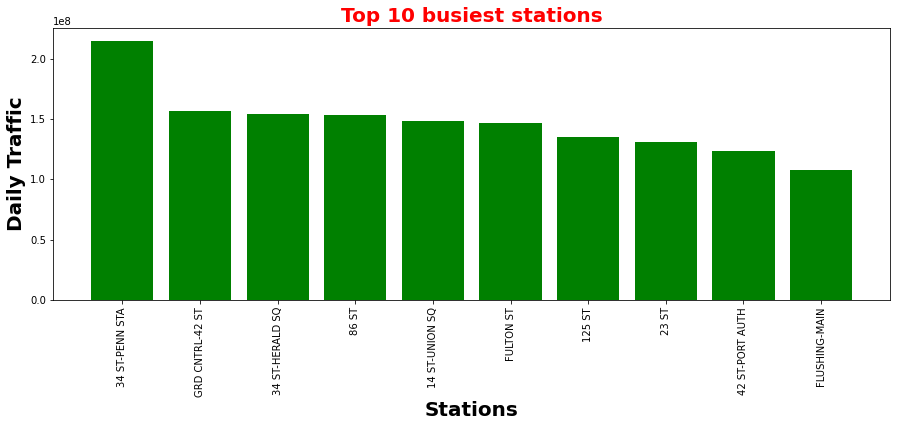

In [46]:
# Show The Ten Top 10 Station To see difference 
plt.figure(figsize=(15,5))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_TRAFFIC'][:10],color='g')
plt.ylabel("Daily Traffic",size=20, weight="bold")
plt.xlabel("Stations", size=20, weight="bold")
plt.xticks(rotation=90)
plt.title('Top 10 busiest stations',size=20, weight="bold",color='r')

Text(0.5, 1.0, 'Top 5 busiest stations')

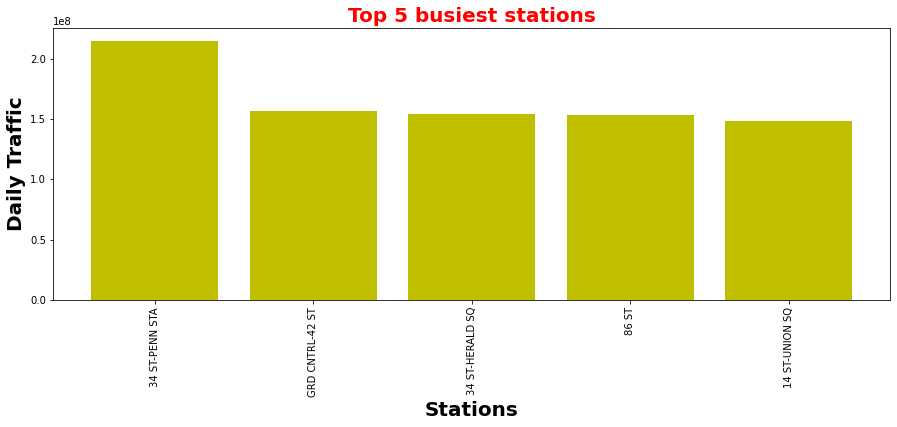

In [47]:
# Show The Ten Top 5 Station To see difference 
plt.figure(figsize=(15,5))
plt.bar(x=station_totals['STATION'][:5], height=station_totals['DAILY_TRAFFIC'][:5],color='y')
plt.ylabel("Daily Traffic",size=20, weight="bold")
plt.xlabel("Stations", size=20, weight="bold")
plt.xticks(rotation=90)
plt.title('Top 5 busiest stations',size=20, weight="bold",color='r')

I Choosed a specific date and the first station from the top 5 

In [48]:
Daily_in_weekend = B_dailyTraff2[(B_dailyTraff2["DATE"] == "10/01/2021") & # is fraiday
(B_dailyTraff2["STATION"] == "34 ST-PENN STA")]

Daily_in_weekend.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
4620,34 ST-PENN STA,0:00 to 4:00,10/01/2021,138596.0
4633,34 ST-PENN STA,4:00 to 8:00,10/01/2021,137268.0
4635,34 ST-PENN STA,16:00 to 20:00,10/01/2021,136889.0
4644,34 ST-PENN STA,12:00 to 16:00,10/01/2021,136052.0
4689,34 ST-PENN STA,8:00 to 12:00,10/01/2021,133360.0


i Choosed a anthor specific date and the first station from the top 5 

Text(0.5, 1.0, 'The Daily Traffic in Weekend of (34 ST-PENN STA) Station ')

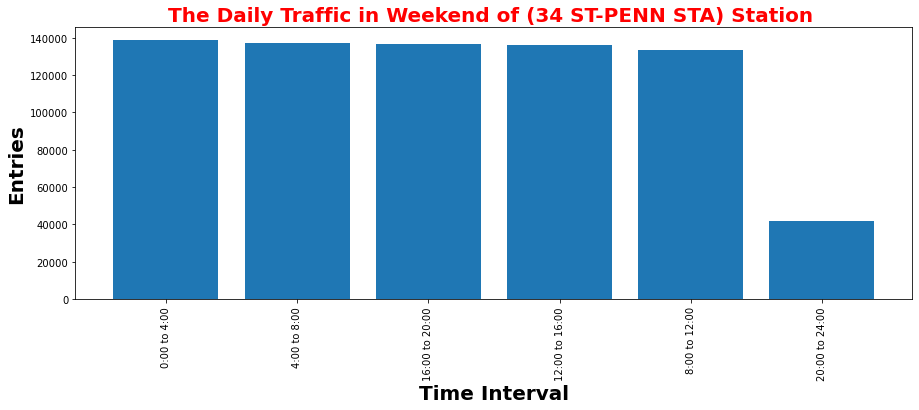

In [49]:
plt.figure(figsize=(15,5))
plt.bar(x=Daily_in_weekend['TIME_INTERVAL'],height=Daily_in_weekend['DAILY_TRAFFIC'])
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.title('The Daily Traffic in Weekend of (34 ST-PENN STA) Station ', color='r',size=20, weight="bold")


In [50]:
Daily_in_sunday = B_dailyTraff2[(B_dailyTraff2["DATE"] == "09/19/2021") & #  is sunday 
(B_dailyTraff2["STATION"] == "34 ST-PENN STA")]

Daily_in_sunday.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
6345,34 ST-PENN STA,0:00 to 4:00,09/19/2021,81897.0
6421,34 ST-PENN STA,4:00 to 8:00,09/19/2021,80871.0
6582,34 ST-PENN STA,8:00 to 12:00,09/19/2021,78883.0
6752,34 ST-PENN STA,12:00 to 16:00,09/19/2021,76711.0
6884,34 ST-PENN STA,16:00 to 20:00,09/19/2021,74477.0


Text(0.5, 1.0, 'The Daily Traffic in Sunday of (34 ST-PENN STA) Station ')

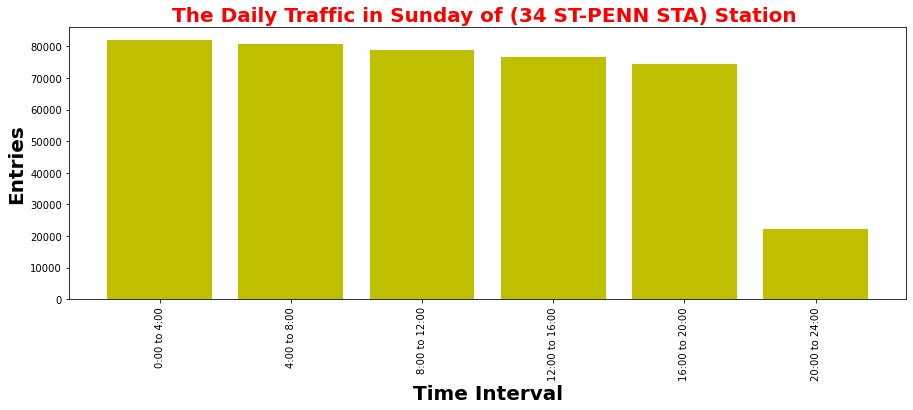

In [51]:
plt.figure(figsize=(15,5))
plt.bar(x=Daily_in_sunday['TIME_INTERVAL'],height=Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.title('The Daily Traffic in Sunday of (34 ST-PENN STA) Station ', color='r',size=20, weight="bold")


Text(0.5, 1.0, 'The Daily Traffic in Friday & Sunday of (34 ST-PENN STA) Station ')

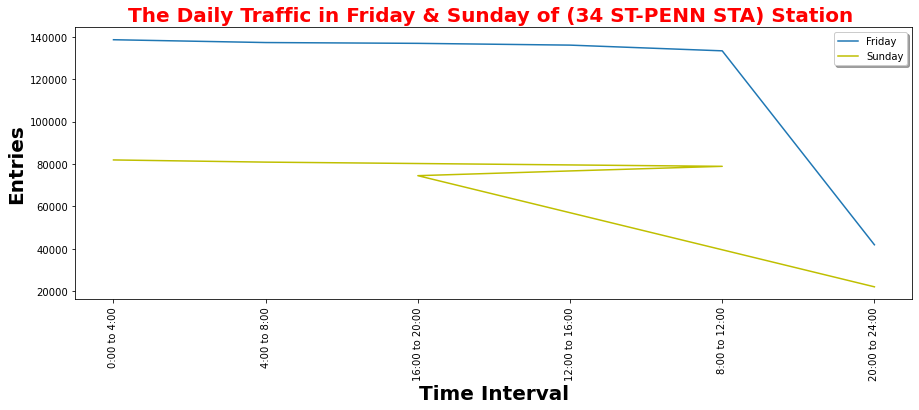

In [52]:
plt.figure(figsize=(15,5))
plt.plot(Daily_in_weekend['TIME_INTERVAL'],Daily_in_weekend['DAILY_TRAFFIC'])
plt.plot(Daily_in_sunday['TIME_INTERVAL'],Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.legend(['Friday','Sunday'],shadow = True, loc = 0);
plt.title('The Daily Traffic in Friday & Sunday of (34 ST-PENN STA) Station ', color='r',size=20, weight="bold")


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

I Measure the busiest days of the week

In [53]:
station_daily_34_st = B_dailyTraff2[B_dailyTraff2['STATION'] == '34 ST-PENN STA']
station_daily_34_st.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,34 ST-PENN STA,16:00 to 20:00,10/31/2020,28910977.0
1,34 ST-PENN STA,12:00 to 16:00,10/31/2020,28882578.0
2,34 ST-PENN STA,8:00 to 12:00,10/31/2020,28867020.0
3,34 ST-PENN STA,4:00 to 8:00,10/31/2020,28847320.0
4,34 ST-PENN STA,0:00 to 4:00,10/31/2020,28839615.0


In [54]:
station_daily_34_st['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_st['DATE']).dt.dayofweek
station_daily_34_st['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_st['DATE']).dt.week
station_daily_34_st.head()


<ipython-input-54-ddff0b83a797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34_st['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_st['DATE']).dt.dayofweek
<ipython-input-54-ddff0b83a797>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_34_st['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_st['DATE']).dt.week
<ipython-input-54-ddff0b83a797>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
0,34 ST-PENN STA,16:00 to 20:00,10/31/2020,28910977.0,5,44
1,34 ST-PENN STA,12:00 to 16:00,10/31/2020,28882578.0,5,44
2,34 ST-PENN STA,8:00 to 12:00,10/31/2020,28867020.0,5,44
3,34 ST-PENN STA,4:00 to 8:00,10/31/2020,28847320.0,5,44
4,34 ST-PENN STA,0:00 to 4:00,10/31/2020,28839615.0,5,44


Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STA station')

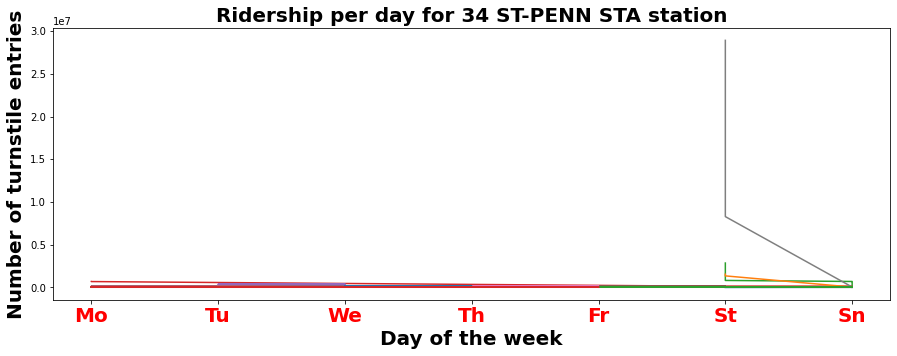

In [55]:
plt.figure(figsize=(15,5))
for i, group in station_daily_34_st.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
    
plt.xlabel('Day of the week',weight="bold",size=20)
plt.ylabel('Number of turnstile entries',weight="bold",size=20)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'],weight="bold",size=20,color='r')
plt.title('Ridership per day for 34 ST-PENN STA station',weight="bold",size=20)

Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STA station')

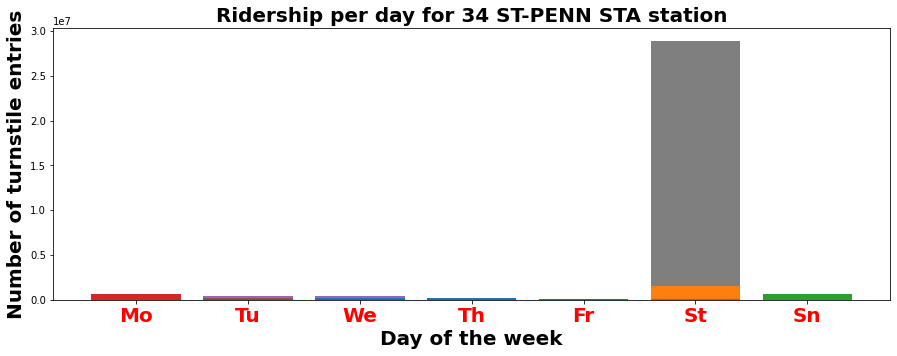

In [56]:
plt.figure(figsize=(15,5))
for i, group in station_daily_34_st.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
    
plt.xlabel('Day of the week',weight="bold",size=20)
plt.ylabel('Number of turnstile entries',weight="bold",size=20)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'],weight="bold",size=20,color='r')
plt.title('Ridership per day for 34 ST-PENN STA station',weight="bold",size=20)

In [57]:
Daily_in_weekend = B_dailyTraff2[(B_dailyTraff2["DATE"] == "10/01/2021") & # is fraiday
(B_dailyTraff2["STATION"] == "GRD CNTRL-42 ST")]

Daily_in_weekend.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
5159,GRD CNTRL-42 ST,0:00 to 4:00,10/01/2021,111500.0
5190,GRD CNTRL-42 ST,4:00 to 8:00,10/01/2021,110440.0
5326,GRD CNTRL-42 ST,8:00 to 12:00,10/01/2021,104959.0
5339,GRD CNTRL-42 ST,12:00 to 16:00,10/01/2021,104376.0
5352,GRD CNTRL-42 ST,16:00 to 20:00,10/01/2021,103497.0


In [58]:
Daily_in_sunday = B_dailyTraff2[(B_dailyTraff2["DATE"] == "09/19/2021") & #  is sunday 
(B_dailyTraff2["STATION"] == "GRD CNTRL-42 ST")]

Daily_in_sunday.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
8236,GRD CNTRL-42 ST,0:00 to 4:00,09/19/2021,58849.0
8314,GRD CNTRL-42 ST,4:00 to 8:00,09/19/2021,58233.0
8643,GRD CNTRL-42 ST,8:00 to 12:00,09/19/2021,55890.0
8994,GRD CNTRL-42 ST,12:00 to 16:00,09/19/2021,52564.0
9520,GRD CNTRL-42 ST,16:00 to 20:00,09/19/2021,49404.0


Text(0.5, 1.0, 'The Daily Traffic in Friday & Sunday of (GRD CNTRL-42 ST) Station ')

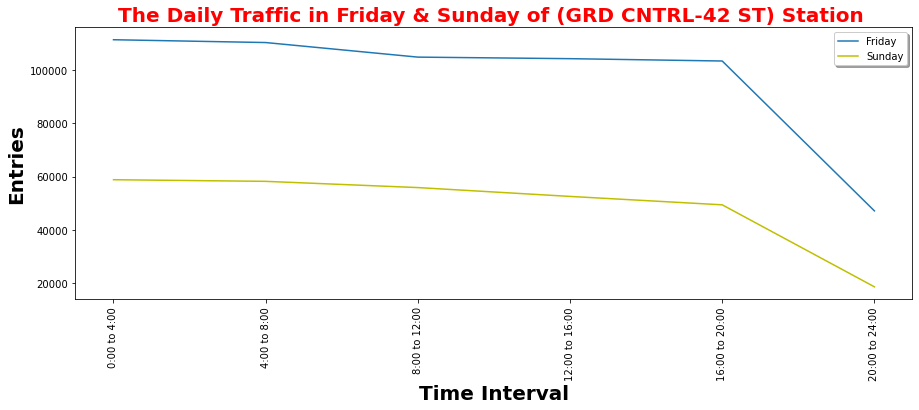

In [59]:
plt.figure(figsize=(15,5))
plt.plot(Daily_in_weekend['TIME_INTERVAL'],Daily_in_weekend['DAILY_TRAFFIC'])
plt.plot(Daily_in_sunday['TIME_INTERVAL'],Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.legend(['Friday','Sunday'],shadow = True, loc = 0);
plt.title('The Daily Traffic in Friday & Sunday of (GRD CNTRL-42 ST) Station ', color='r',size=20, weight="bold")


In [60]:
Daily_in_weekend = B_dailyTraff2[(B_dailyTraff2["DATE"] == "10/01/2021") & # is fraiday
(B_dailyTraff2["STATION"] == "34 ST-HERALD SQ")]

Daily_in_weekend.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
5367,34 ST-HERALD SQ,16:00 to 20:00,10/01/2021,102802.0
5397,34 ST-HERALD SQ,0:00 to 4:00,10/01/2021,101939.0
5424,34 ST-HERALD SQ,4:00 to 8:00,10/01/2021,101092.0
5434,34 ST-HERALD SQ,12:00 to 16:00,10/01/2021,100865.0
5484,34 ST-HERALD SQ,8:00 to 12:00,10/01/2021,98662.0


In [61]:
Daily_in_sunday = B_dailyTraff2[(B_dailyTraff2["DATE"] == "09/19/2021") & #  is sunday 
(B_dailyTraff2["STATION"] == "34 ST-HERALD SQ")]

Daily_in_sunday.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
6624,34 ST-HERALD SQ,0:00 to 4:00,09/19/2021,78401.0
6705,34 ST-HERALD SQ,4:00 to 8:00,09/19/2021,77212.0
6840,34 ST-HERALD SQ,8:00 to 12:00,09/19/2021,75382.0
7039,34 ST-HERALD SQ,12:00 to 16:00,09/19/2021,72217.0
7386,34 ST-HERALD SQ,16:00 to 20:00,09/19/2021,67572.0


Text(0.5, 1.0, 'The Daily Traffic in Friday & Sunday of (34 ST-HERALD SQ) Station ')

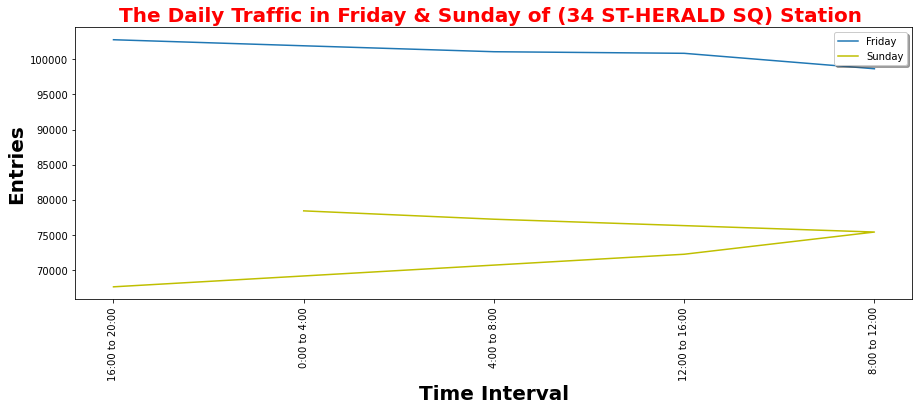

In [62]:
plt.figure(figsize=(15,5))
plt.plot(Daily_in_weekend['TIME_INTERVAL'],Daily_in_weekend['DAILY_TRAFFIC'])
plt.plot(Daily_in_sunday['TIME_INTERVAL'],Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.legend(['Friday','Sunday'],shadow = True, loc = 0);
plt.title('The Daily Traffic in Friday & Sunday of (34 ST-HERALD SQ) Station ', color='r',size=20, weight="bold")


In [63]:
Daily_in_weekend = B_dailyTraff2[(B_dailyTraff2["DATE"] == "10/01/2021") & # is fraiday
(B_dailyTraff2["STATION"] == "86 ST")]

Daily_in_weekend.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
5477,86 ST,16:00 to 20:00,10/01/2021,98817.0
5480,86 ST,0:00 to 4:00,10/01/2021,98751.0
5488,86 ST,12:00 to 16:00,10/01/2021,98505.0
5504,86 ST,4:00 to 8:00,10/01/2021,97948.0
5520,86 ST,8:00 to 12:00,10/01/2021,97463.0


In [64]:
Daily_in_sunday = B_dailyTraff2[(B_dailyTraff2["DATE"] == "09/19/2021") & #  is sunday 
(B_dailyTraff2["STATION"] == "86 ST")]

Daily_in_sunday.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
8725,86 ST,0:00 to 4:00,09/19/2021,55104.0
8825,86 ST,4:00 to 8:00,09/19/2021,54168.0
9148,86 ST,8:00 to 12:00,09/19/2021,51634.0
9631,86 ST,12:00 to 16:00,09/19/2021,48693.0
10080,86 ST,16:00 to 20:00,09/19/2021,46355.0


Text(0.5, 1.0, 'The Daily Traffic in Friday & Sunday of (86 ST) Station ')

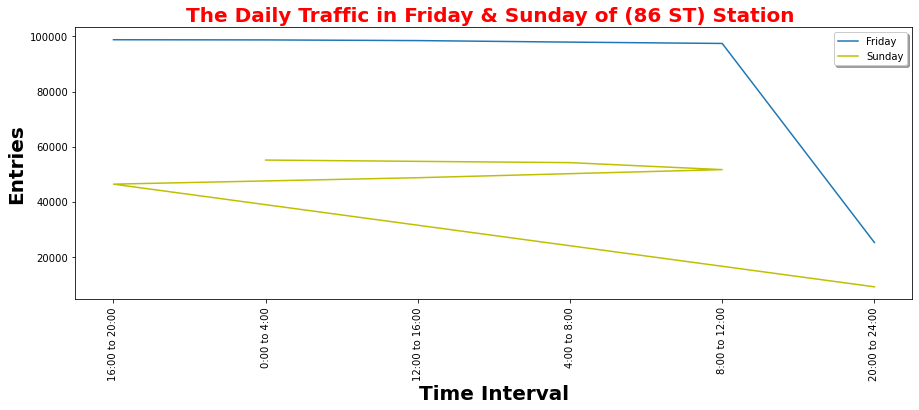

In [65]:
plt.figure(figsize=(15,5))
plt.plot(Daily_in_weekend['TIME_INTERVAL'],Daily_in_weekend['DAILY_TRAFFIC'])
plt.plot(Daily_in_sunday['TIME_INTERVAL'],Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.legend(['Friday','Sunday'],shadow = True, loc = 0);
plt.title('The Daily Traffic in Friday & Sunday of (86 ST) Station ', color='r',size=20, weight="bold")


In [66]:
Daily_in_weekend = B_dailyTraff2[(B_dailyTraff2["DATE"] == "10/01/2021") & # is fraiday
(B_dailyTraff2["STATION"] == "14 ST-UNION SQ")]

Daily_in_weekend.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
5450,14 ST-UNION SQ,20:00 to 24:00,10/01/2021,99889.0
5472,14 ST-UNION SQ,16:00 to 20:00,10/01/2021,99063.0
5540,14 ST-UNION SQ,4:00 to 8:00,10/01/2021,96931.0
5550,14 ST-UNION SQ,0:00 to 4:00,10/01/2021,96705.0
5564,14 ST-UNION SQ,12:00 to 16:00,10/01/2021,96400.0


In [67]:
Daily_in_sunday = B_dailyTraff2[(B_dailyTraff2["DATE"] == "09/19/2021") & #  is sunday 
(B_dailyTraff2["STATION"] == "14 ST-UNION SQ")]

Daily_in_sunday.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
6901,14 ST-UNION SQ,4:00 to 8:00,09/19/2021,74267.0
6932,14 ST-UNION SQ,0:00 to 4:00,09/19/2021,73898.0
7010,14 ST-UNION SQ,8:00 to 12:00,09/19/2021,72841.0
7179,14 ST-UNION SQ,12:00 to 16:00,09/19/2021,70131.0
7354,14 ST-UNION SQ,16:00 to 20:00,09/19/2021,68026.0


Text(0.5, 1.0, 'The Daily Traffic in Friday & Sunday of (14 ST-UNION SQ) Station ')

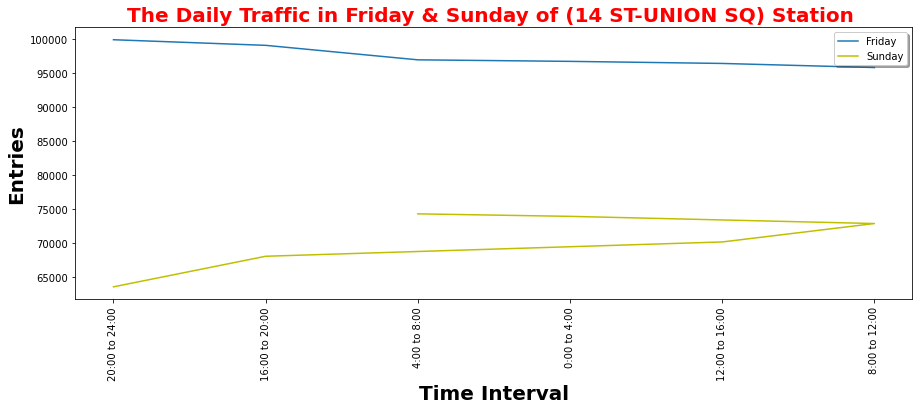

In [68]:
plt.figure(figsize=(15,5))
plt.plot(Daily_in_weekend['TIME_INTERVAL'],Daily_in_weekend['DAILY_TRAFFIC'])
plt.plot(Daily_in_sunday['TIME_INTERVAL'],Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.legend(['Friday','Sunday'],shadow = True, loc = 0);
plt.title('The Daily Traffic in Friday & Sunday of (14 ST-UNION SQ) Station ', color='r',size=20, weight="bold")


**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************

End of my analysis 

**********************************************************************************************************
**********************************************************************************************************
**********************************************************************************************************